Vector unary operations
=======================


In [1]:
Boyle.activate("project-numy")

Resolving Hex dependencies...
Dependency resolution completed:
Unchanged:
  gnuplot 1.19.96
  numy 0.1.5
All dependencies are up to date
make: Nothing to be done for 'all'.


:ok

## Negate, scale and offset

In [21]:
alias Numy.Vc
alias Numy.Vcm
alias Numy.Lapack, as: La

v = La.Vector.new(-3..3) # let's create vector with values from -3 to 3
Vc.data(v)

[-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0]

We can change sign of each element in-place with `Vcm.negate!`.

In [22]:
v = La.Vector.new(-3..3)
Vcm.negate!(v)
v

#Vector<size=7, [3.0, 2.0, 1.0, 0.0, -1.0, -2.0, -3.0]>

Or we can use `Vc` protocol and do not mutate the state of the
original vector (copies are created).

In [23]:
v = La.Vector.new(-3..3)
vneg = Vc.negate(v)

#Vector<size=7, [3.0, 2.0, 1.0, 0.0, -1.0, -2.0, -3.0]>

We can add some constant to all elements.

In [24]:
vsh = Vc.offset(v, 0.5)

#Vector<size=7, [-2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5]>

We can multiply each element of a vector by a constant factor.

In [25]:
vm = Vc.scale(v, 2)

#Vector<size=7, [-6.0, -4.0, -2.0, 0.0, 2.0, 4.0, 6.0]>

Let us plot all these vectors as they are segments of some lines. This way the transformations get visual representation.

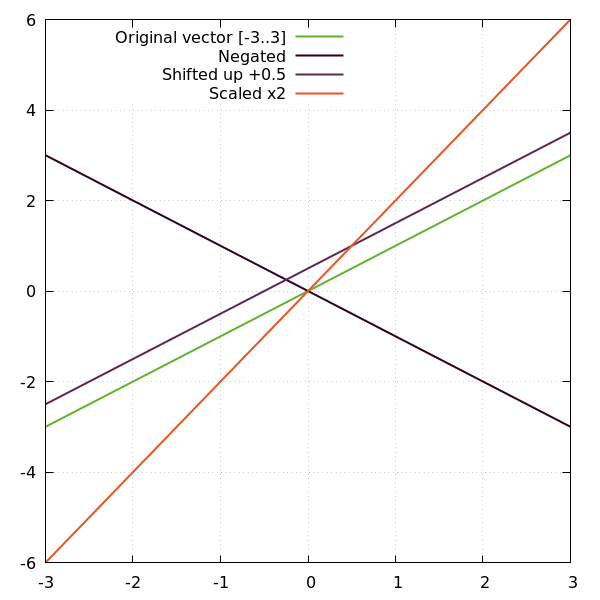

In [26]:
points = [-3,-2,-1,0,1,2,3]
datasets = for ds <- [Vc.data(v),Vc.data(vneg),Vc.data(vsh),Vc.data(vm)], do:
  Enum.zip(points, ds)

Gnuplot.plot([
  ~w(set terminal pngcairo size 600,600)a,
  ~w(set output)a,
  ~w(set key left top)a,
  ~w(set grid xtics ytics)a,
  ~w(set style line 1 lw 2 lc '#63b132')a,
  ~w(set style line 2 lw 2 lc '#2C001E')a,
  ~w(set style line 3 lw 2 lc '#5E2750')a,
  ~w(set style line 4 lw 2 lc '#E95420')a,
  Gnuplot.plots([
    ["-", :title, "Original vector [-3..3]", :with, :lines, :ls, 1],
    ["-", :title, "Negated", :with, :lines, :ls, 2],
    ["-", :title, "Shifted up +0.5", :with, :lines, :ls, 3],
    ["-", :title, "Scaled x2", :with, :lines, :ls, 4],
  ])
  ],
  datasets
)

Numy.Gnuplot.capture() |> Base.encode64 |> IO.write
:"this is an inline image"

## Change order of elements with `reverse` and `sort`

In [27]:
v = La.Vector.new(10) # create a vector with 10 elements
v |> Vc.assign_random |> Vcm.scale!(10) # assign random values to all elements

#Vector<size=10, [5.6130596569612905, 9.840764400219584, 2.582497102267012, 5.184073770164411, 4.726455943957823, 8.265903932155167, 0.7289093519856282, 9.665198245909032, 2.4094759575787816, 5.381457060977964]>

In [28]:
v |> Vcm.reverse! # reverse in-place

#Vector<size=10, [5.381457060977964, 2.4094759575787816, 9.665198245909032, 0.7289093519856282, 8.265903932155167, 4.726455943957823, 5.184073770164411, 2.582497102267012, 9.840764400219584, 5.6130596569612905]>

In [29]:
v |> Vcm.sort!

#Vector<size=10, [0.7289093519856282, 2.4094759575787816, 2.582497102267012, 4.726455943957823, 5.184073770164411, 5.381457060977964, 5.6130596569612905, 8.265903932155167, 9.665198245909032, 9.840764400219584]>

## Apply simple filters, step function and sigmoid.

In [30]:
v = La.Vector.new(10)
v |> Vc.assign_random
v |> Vcm.offset!(-0.5) # shift down by 0.5 so we get negative values
step = v |> Vc.apply_heaviside

#Vector<size=10, [1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0]>

In [31]:
sgm = v |> Vc.apply_sigmoid

#Vector<size=10, [0.5037123227865954, 0.45908076577435325, 0.5885614980118701, 0.6155965259259929, 0.5020119644532596, 0.4448295176352299, 0.5641806965672592, 0.5378986765008963, 0.4042015131917694, 0.4042378330297668]>

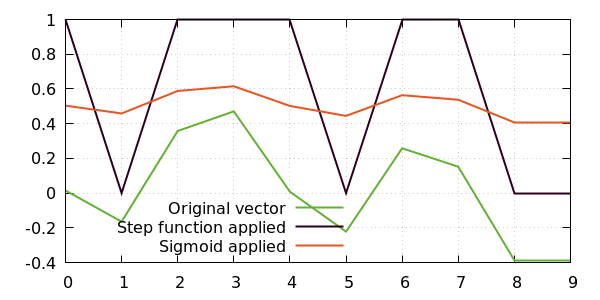

In [32]:
points = Enum.to_list(0..9)
datasets = for ds <- [Vc.data(v),Vc.data(step),Vc.data(sgm)], do:
  Enum.zip(points, ds)

Gnuplot.plot([
  ~w(set terminal pngcairo size 600,300)a,
  ~w(set output)a,
  ~w(set key left bottom)a,
  ~w(set grid xtics ytics)a,
  ~w(set style line 1 lw 2 lc '#63b132')a,
  ~w(set style line 2 lw 2 lc '#2C001E')a,
  ~w(set style line 3 lw 2 lc '#E95420')a,
  Gnuplot.plots([
    ["-", :title, "Original vector", :with, :lines, :ls, 1],
    ["-", :title, "Step function applied", :with, :lines, :ls, 2],
    ["-", :title, "Sigmoid applied", :with, :lines, :ls, 3]
  ])
  ],
  datasets
)

TerminalOutput.capture() |> Base.encode64 |> IO.write
:"this is an inline image"